In [1]:
#//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
#///////////////////////////////////////////////// Libraries  ////////////////////////////////////////////////////////

import dpkt
from dpkt.compat import compat_ord
import os 
import pcap
import pandas as pd
import socket
import timeit
from timeit import default_timer as timer
from datetime import timedelta
import datetime
import openpyxl
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m' 

In [3]:
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////// 
#///////////////////////////////////////////////// User Controls ////////////////////////////////////////////////////// 

time_step = 1           # seconds   
sim_weeks = 10
path_in = 'ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/'
path_out = '../icss_plots/cyber_features/tank_3_overflow_offset'
filenames = os.listdir(path_in)
print(filenames)

# PLC addresses
ip_adrs = ['10.0.2.1','10.0.3.1','10.0.4.1','10.0.6.1','10.0.7.1','10.0.9.1'] 
          # '10.0.1.1','10.0.5.1','10.0.8.1','192.168.1.2',
name_node = ['PLC2', 'PLC3', 'PLC4', 'PLC6', 'PLC7', 'PLC9']
          # 'PLC1', 'PLC5', 'PLC8', 'SCADA'  

# target ethernet 
type_eth = 2048

['arp_poison.log', 'attacker.log', 'client.log', 'physical.log', 'physical_process.csv', 'plc1-eth0.pcap', 'plc1.log', 'plc1_saved_tank_levels_received.csv', 'plc2-eth0.pcap', 'plc2.log', 'plc2_saved_tank_levels_received.csv', 'plc3-eth0.pcap', 'plc3.log', 'plc3_saved_tank_levels_received.csv', 'plc4-eth0.pcap', 'plc4.log', 'plc4_saved_tank_levels_received.csv', 'plc5-eth0.pcap', 'plc5.log', 'plc5_saved_tank_levels_received.csv', 'plc6-eth0.pcap', 'plc6.log', 'plc6_saved_tank_levels_received.csv', 'plc7-eth0.pcap', 'plc7.log', 'plc7_saved_tank_levels_received.csv', 'plc9-eth0.pcap', 'plc9.log', 'plc9_saved_tank_levels_received.csv', 'scada-eth0.pcap', 'scada.log', 'scada_saved_tank_levels_received.csv', 'server.log']


 Files processed for SCADA-PLC2 
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/arp_poison.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/attacker.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/client.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical_process.csv
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1-eth0.pcap
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1_saved_tank_levels

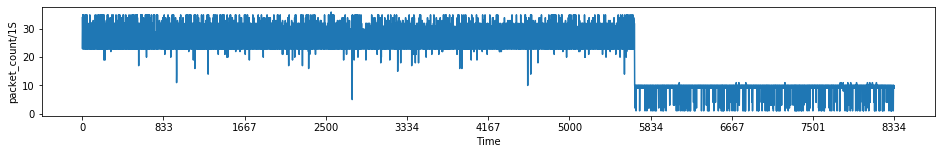

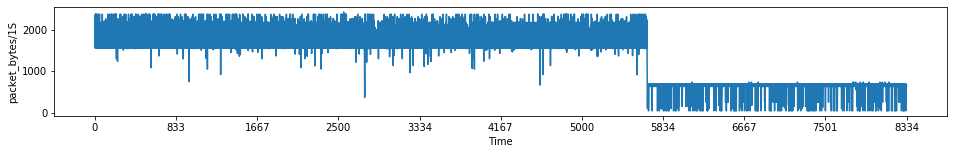

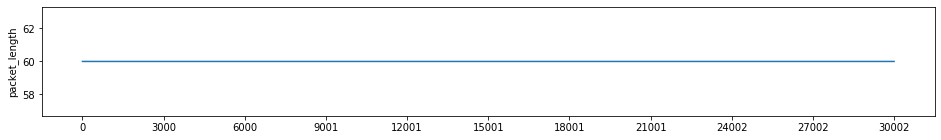

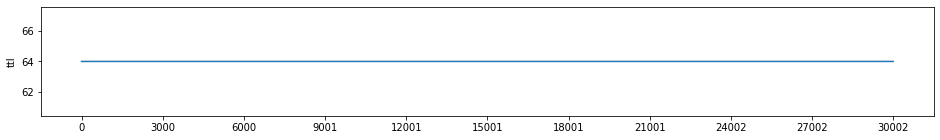

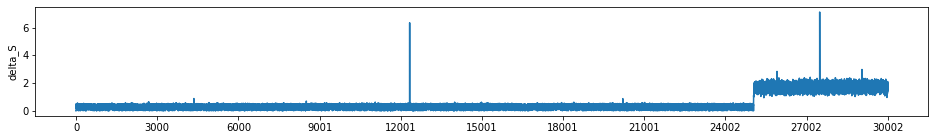

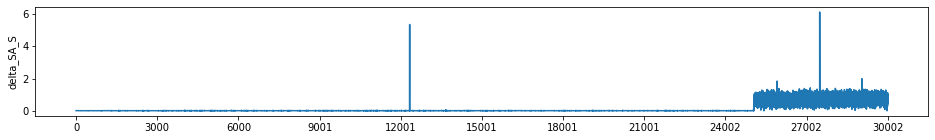

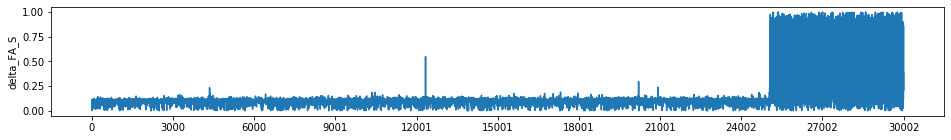

 Files processed for SCADA-PLC3 
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/arp_poison.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/attacker.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/client.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical_process.csv
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1-eth0.pcap
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1_saved_tank_levels

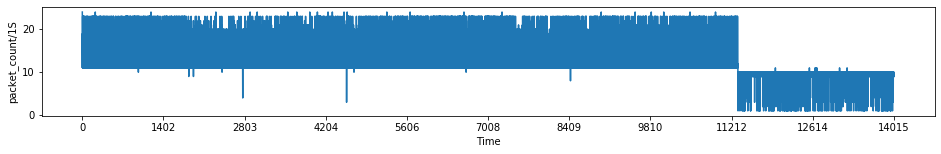

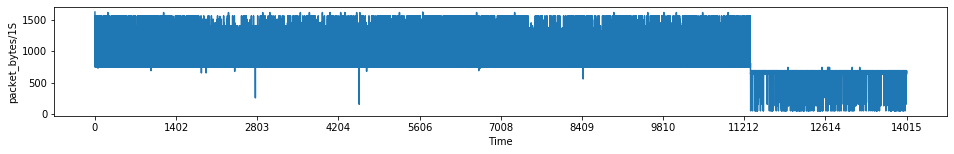

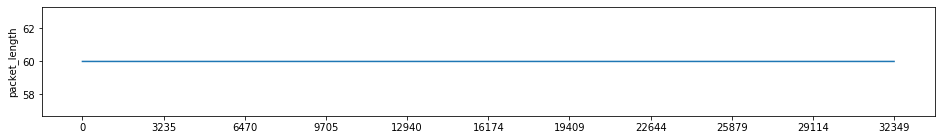

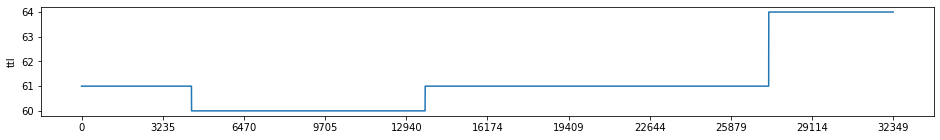

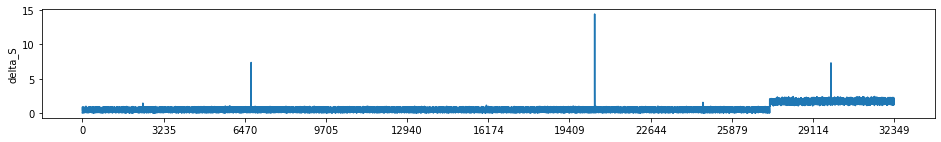

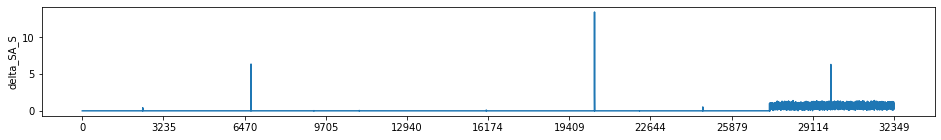

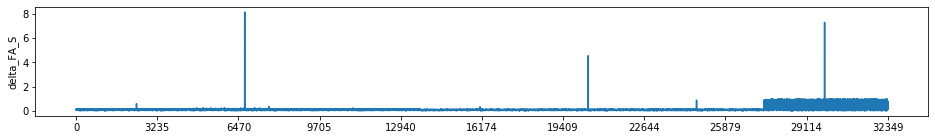

 Files processed for SCADA-PLC4 
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/arp_poison.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/attacker.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/client.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical_process.csv
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1-eth0.pcap
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1_saved_tank_levels

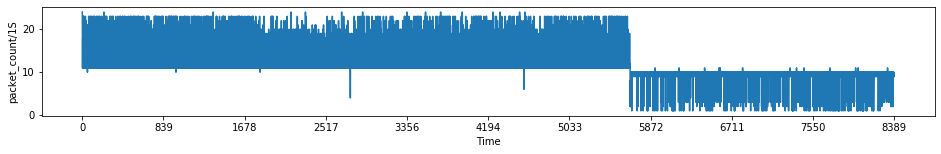

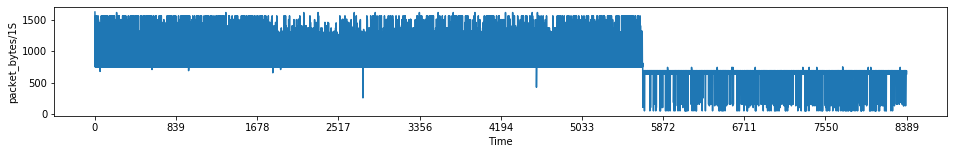

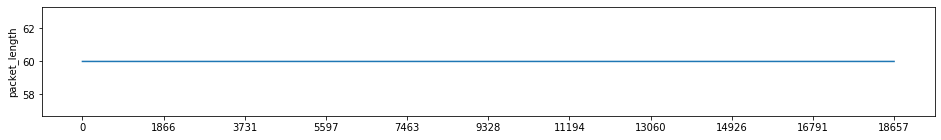

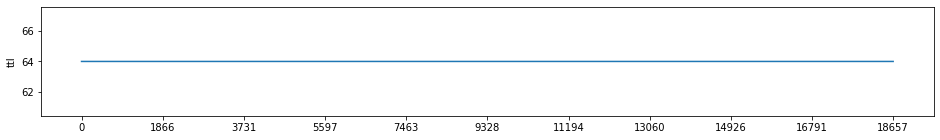

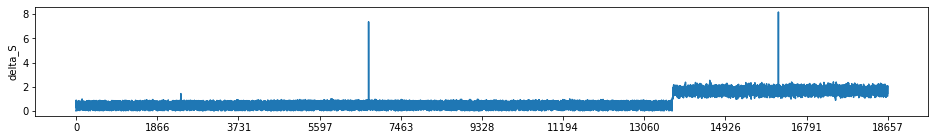

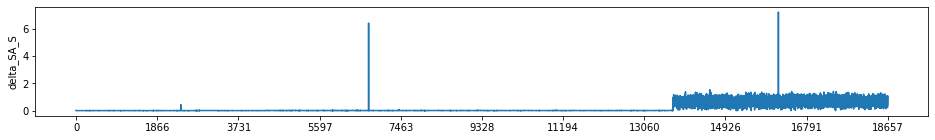

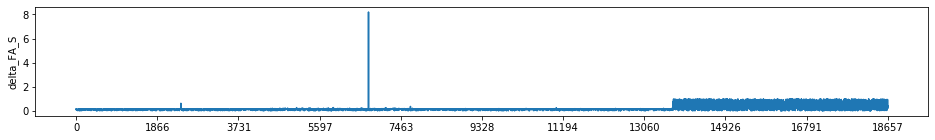

 Files processed for SCADA-PLC6 
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/arp_poison.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/attacker.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/client.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical_process.csv
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1-eth0.pcap
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1_saved_tank_levels

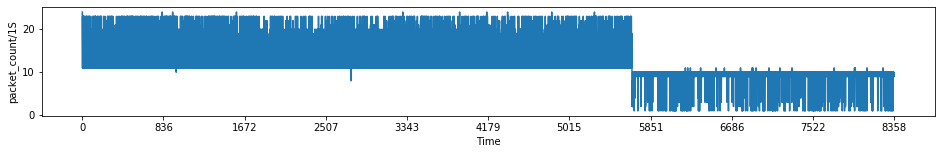

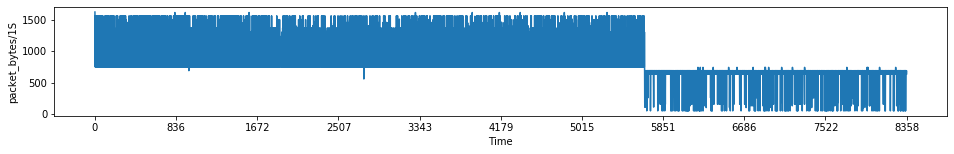

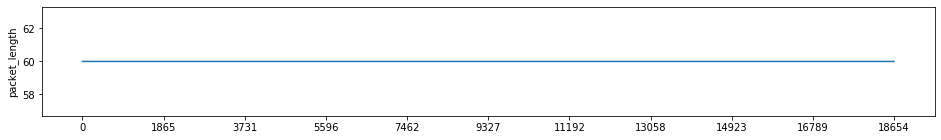

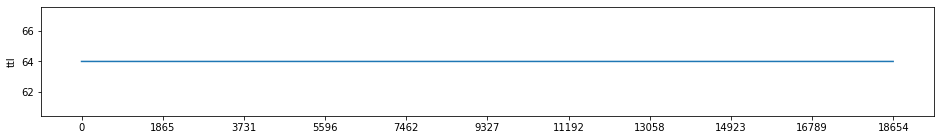

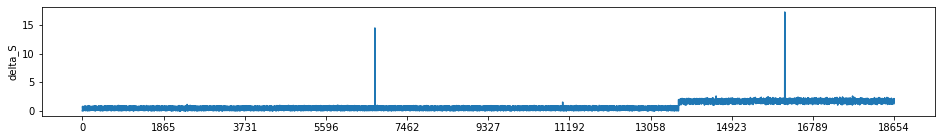

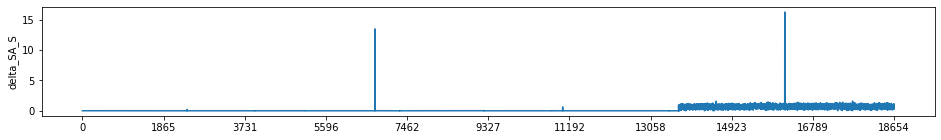

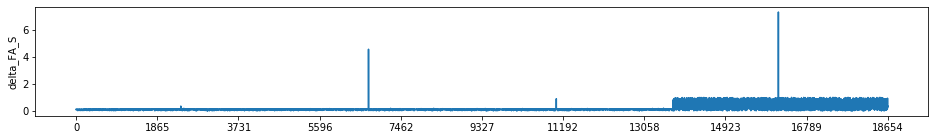

 Files processed for SCADA-PLC7 
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/arp_poison.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/attacker.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/client.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical_process.csv
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1-eth0.pcap
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1_saved_tank_levels

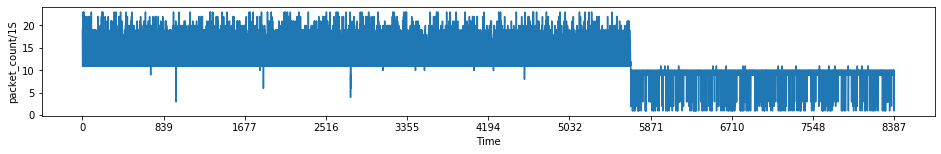

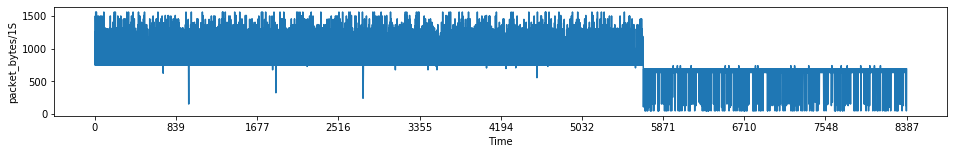

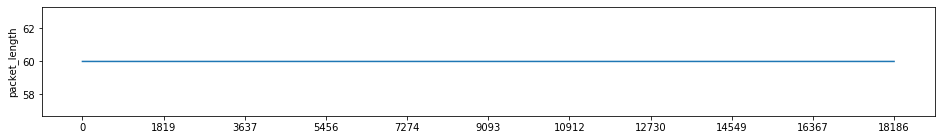

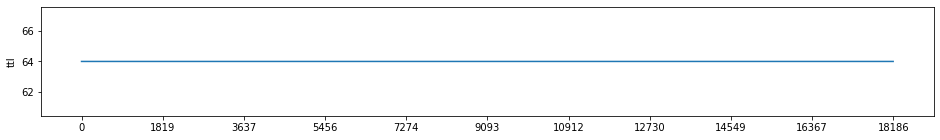

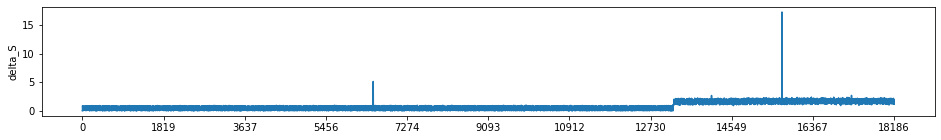

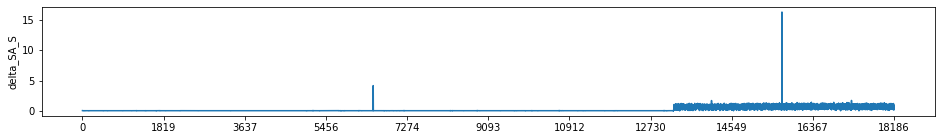

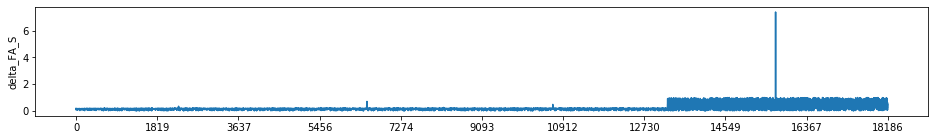

 Files processed for SCADA-PLC9 
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/arp_poison.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/attacker.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/client.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/physical_process.csv
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1-eth0.pcap
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1.log
ICS_topologies/enhanced_ctown_topology/icss_paper_attacks/icss_paper_plots/tank_3_overflow_offset/week_19/plc1_saved_tank_levels

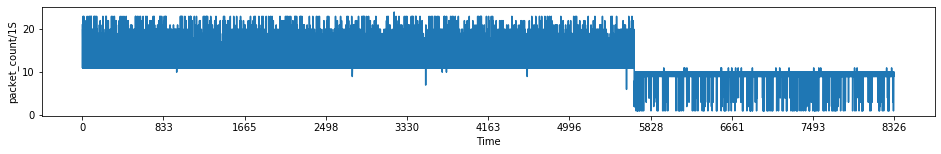

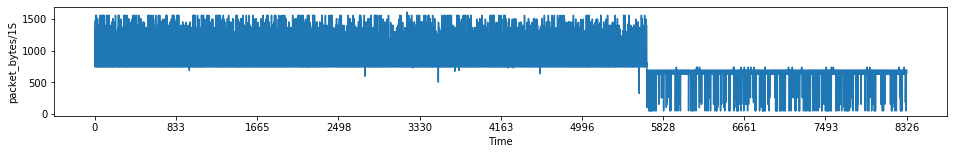

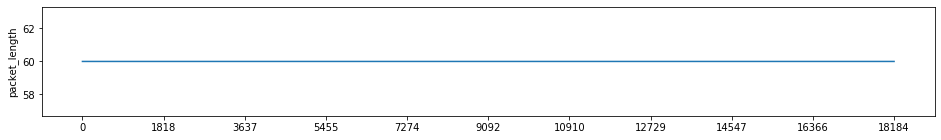

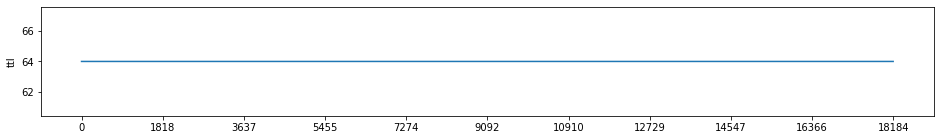

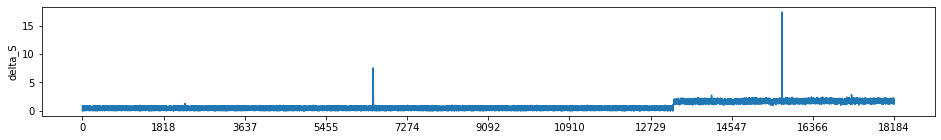

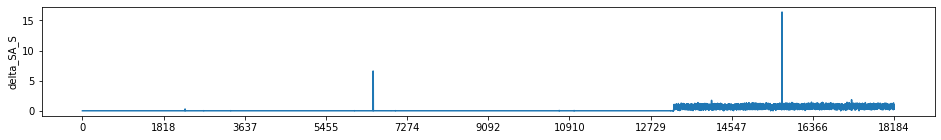

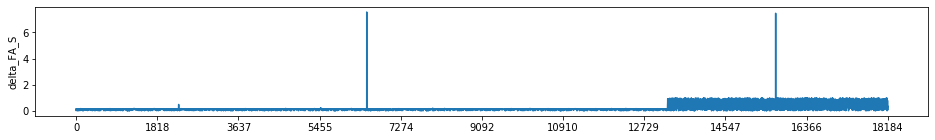


 Total computation time: 0:02:25.588390


In [4]:
#//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
#///////////////////////////////////////////////// deep packet parsing ////////////////////////////////////////////////

# Andres: These functions convert the MAC address to human readable format and decode the TCP flags

def mac_addr(address):
    """Convert a MAC address to a readable/printable string
    """
    return ':'.join('%02x' % compat_ord(b) for b in address)

def decode_flags(flag_field):
    """ Decodes the flag field in TCP packets
    """
    FIN = 1
    SYN = 2
    ACK = 16
    SYN_ACK = 18
    FIN_ACK = 17
    
    if flag_field == FIN:
        answer = 'F'
    elif flag_field == SYN:
        answer = 'S'
    elif flag_field == ACK:        
        answer = 'A'
    elif flag_field == SYN_ACK:                
        answer = 'S_A'
    elif flag_field == FIN_ACK:                
        answer = 'F_A'
    else:
        answer = 'X'
        
    return answer

#//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
#///////////////////////////////////////////////// deep packet parsing ////////////////////////////////////////////////

start = timer()

for k in range(0, len(ip_adrs)):
    name_save = path_out + name_node[k] + '_Specific TCP Packets.csv'
    name_save1 = path_out + name_node[k] + '_All TCP Packets.csv'
    data_parsed = []
    print(color.PURPLE, color.BOLD + 'Files processed for SCADA-' + name_node[k], color.END)
    output = []

    for i in range (0, len(filenames)):
        filename1 = path_in + filenames[i]
        
        print (filename1)

        get_t = 1
        pkt_cnt = 0
        pkt_byt = 0
        out1 = {}
    
        if filename1.split(".")[1] != "pcap":
            continue
                
        try:        
            f = open(filename1, 'rb')
            pcap = dpkt.pcap.Reader(f)        

            for ts, pkt in pcap:
                eth = dpkt.ethernet.Ethernet(pkt)

                #eth = dpkt.ethernet.Ethernet(pkt)
                if eth.type == type_eth:
                    if eth.data.p==dpkt.ip.IP_PROTO_TCP:                
                        ip  = eth.data
                        tcp = ip.data
                        flags = decode_flags(tcp.flags)
                        if socket.inet_ntoa(ip.src) == ip_adrs[k] or socket.inet_ntoa(ip.dst) == ip_adrs[k]:

#///////////////////////////////////////////////// All TCP Packets ////////////////////////////////////////////////

# initiating time window            
                            if get_t == 1:
                                time0 = ts #int(t)  # this may be int(t) to round the time  
                                time1 = time0 + time_step
                                get_t = 0 

# computing data whitin the time window                
                            if (ts >= time0 and ts < time1):
                                pkt_cnt += 1
                                pkt_byt += ip.len #len(Ethernet(pkt))

                            elif ts >= time1:

# recording if there were computations within the time window                
                                if pkt_cnt > 0: 
                                    out1['t'] = time0
                                    out1['packet_count'] = pkt_cnt
                                    out1['packet_bytes'] = pkt_byt
                                    output.append(out1) 

# new time window & reseting computable variables 
                                time0 = time1
                                time1 = time0 + time_step
                                out1 = {}
                                pkt_cnt = 0
                                pkt_byt = 0                        

#///////////////////////////////////////////////// TCP Specific Flags  ////////////////////////////////////////////////

                        if flags == 'S' or flags == 'S_A' or flags == 'F_A':
                            if socket.inet_ntoa(ip.src) == ip_adrs[k] or socket.inet_ntoa(ip.dst) == ip_adrs[k]:
                                if get_t == 1:
                                    time0 = ts
                                    get_t = 0
# S flags                            
                                if flags == 'S':
                                    data1 = {}
                                    data1['t_stamp'] = ts
                                    delta_S = ts - time0 
                                    time0 = ts

                                    time_S0 = ts
                                    data1['packet_length'] = ip.len
                                    data1['MAC_address'] = mac_addr(eth.src)
                                    data1['type'] = eth.type
                                    data1['ttl'] = ip.ttl
                                    data1['TCP_flag'] = flags
                                    data1['Src_ip'] = socket.inet_ntoa(ip.src)
                                    data1['Dst_ip'] = socket.inet_ntoa(ip.dst)
                                    data1['delta_S'] = delta_S
# SA-S flags                         
                                if flags == 'S_A':
                                    data1['delta_SA_S'] = ts-time0
# FA-S flags        
                                if flags == 'F_A':
                                    data1['delta_FA_S'] = ts-time0                                                              

                                    data_parsed.append(data1)
        except Exception:
            continue
                    
# all packets                    
    out_all = pd.DataFrame(output)
    out_all.to_csv(name_save1) 

# TCP specific flags
    data_parsed1 = pd.DataFrame(data_parsed)            
    data_parsed1.to_csv(name_save)    

    
#//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
#////////////////////////////////////////////////////// Plotting /////////////////////////////////////////////////////

    print('')
    print(color.PURPLE, color.BOLD + 'SCADA-' + name_node[k] + color.END)
    print('')
    
    variables = ['packet_count', 'packet_bytes']
    n = len(out_all)+1
    out_all['sample'] = list(range(1, n))
    xlabel_weeks = np.linspace(0, len(out_all), sim_weeks+1)
    
    for var in variables:
        plt.figure(figsize=(16, 2))
        plt.plot(out_all[var])
        #plt.title(name_node[k])
        plt.ylabel(var+'/'+ str (time_step) + 'S')
        plt.xlabel('Time')
        plt.xticks(xlabel_weeks)
        plt.show()

    
    variables = ['packet_length', 'ttl', 'delta_S', 'delta_SA_S', 'delta_FA_S'] 
    n = len(data_parsed1)+1
    data_parsed1['sample'] = list(range(1, n))
    xlabel_weeks = np.linspace(0, len(data_parsed1), sim_weeks+1)
    
    for var in variables:
        plt.figure(figsize=(16, 2))
        plt.plot(data_parsed1[var])
        #plt.title(name_node[k])
        plt.ylabel(var)
        plt.xticks(xlabel_weeks)
        plt.show()
    
end = timer()

print('')
print(color.PURPLE, color.BOLD + 'Total computation time: '+ str(timedelta(seconds=end-start)) + color.END)
